# Q Learning

In [1]:
import gym
import random
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def plot_q_values(Q, env, figsize=(15, 10)):
    num_states = env.observation_space.n
    num_actions = env.action_space.n
    Q_reshaped = np.zeros((num_states, num_actions))

    for (s, a), value in Q.items():
        Q_reshaped[s, a] = value

    fig, ax = plt.subplots(figsize=figsize)
    im = ax.imshow(Q_reshaped, cmap='cool')

    for i in range(num_states):
        for j in range(num_actions):
            ax.text(j, i, f"{Q_reshaped[i, j]:.3f}", ha='center', va='center', fontsize=14)

    ax.set_xticks(np.arange(num_actions))
    ax.set_yticks(np.arange(num_states))
    ax.set_xticklabels([str(a) for a in range(num_actions)])
    ax.set_yticklabels([str(s) for s in range(num_states)])
    plt.xlabel("Actions")
    plt.ylabel("States")
    plt.title('Q-Table')
    plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Now, let's define the epsilon-greedy policy. We generate a random number from the
uniform distribution and if the random number is less than epsilon we select the random
action else we select the best action which has the maximum Q value:

In [3]:
def epsilon_greedy(state, epsilon):
    if random.uniform(0,1) < epsilon:
        return env.action_space.sample()
    else:
        return max(list(range(env.action_space.n)), key = lambda x: Q[(state,x)])

In [4]:
# Create the FrozenLake environment using gym
env = gym.make('FrozenLake-v1')

/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [5]:
num_episodes = 5000
num_steps = 1000

# Define a range of hyperparameter values to test
alphas = [0.1, 0.2, 0.3, 0.4, 0.5]
gammas = [0.8, 0.85, 0.9, 0.95, 1.0]
epsilons = [0.1, 0.2, 0.3, 0.4, 0.5]

In [6]:
best_result = float('inf')
best_hyperparameters = None

# Q-Learning update rule with hyperparameter tuning and result printing
for alpha in alphas:
    for gamma in gammas:
        for epsilon in epsilons:

            # Let's define the dictionary for storing the Q value of the state-action pair and we initialize the Q value of all the state-action pair to 0.0
            Q = {}
            for s in range(env.observation_space.n):
                for a in range(env.action_space.n):
                    Q[(s, a)] = 0.0

            success_count = 0
            total_reward = 0
            total_steps_to_goal = 0
            total_exploration_steps = 0

            for i in range(num_episodes):
                s = env.reset()
                steps_to_goal = 0
                exploration_steps = 0

                for t in range(num_steps):
                    a = epsilon_greedy(s, epsilon)
                    s_, r, done, _ = env.step(a)
                    a_ = np.argmax([Q[(s_, a)] for a in range(env.action_space.n)])
                    Q[(s, a)] += alpha * (r + gamma * Q[(s_, a_)] - Q[(s, a)])
                    total_reward += r
                    steps_to_goal += 1
                    exploration_steps += int(random.uniform(0, 1) < epsilon)

                    s = s_

                    if done:
                        break

                    if r == 1:
                        success_count += 1

                total_steps_to_goal += steps_to_goal
                total_exploration_steps += exploration_steps

            average_reward = total_reward / num_episodes
            success_rate = success_count / num_episodes
            average_steps_to_goal = total_steps_to_goal / num_episodes
            exploration_rate = total_exploration_steps / (num_episodes * num_steps)

            print("Hyperparameters:", (alpha, gamma, epsilon))
            print("Average Reward:", average_reward)
            print("Success Rate:", success_rate)
            print("Average Steps to Goal:", average_steps_to_goal)
            print("Exploration Rate:", exploration_rate)
            print("-------------")

            if average_steps_to_goal < best_result:
                best_result = average_steps_to_goal
                best_hyperparameters = (alpha, gamma, epsilon)
                best_Q = Q
                best_env = env

# Print the best hyperparameters and their corresponding success rate
print("Best Hyperparameters:", best_hyperparameters)
print("Best Average Steps to Goal:", best_result)


Hyperparameters: (0.1, 0.8, 0.1)
Average Reward: 0.1006
Success Rate: 0.0
Average Steps to Goal: 14.0516
Exploration Rate: 0.001383
-------------
Hyperparameters: (0.1, 0.8, 0.2)
Average Reward: 0.08
Success Rate: 0.0
Average Steps to Goal: 13.6342
Exploration Rate: 0.0027154
-------------
Hyperparameters: (0.1, 0.8, 0.3)
Average Reward: 0.0824
Success Rate: 0.0
Average Steps to Goal: 12.1428
Exploration Rate: 0.0036048
-------------
Hyperparameters: (0.1, 0.8, 0.4)
Average Reward: 0.0706
Success Rate: 0.0
Average Steps to Goal: 11.2028
Exploration Rate: 0.0044838
-------------
Hyperparameters: (0.1, 0.8, 0.5)
Average Reward: 0.049
Success Rate: 0.0
Average Steps to Goal: 10.0252
Exploration Rate: 0.0050328
-------------
Hyperparameters: (0.1, 0.85, 0.1)
Average Reward: 0.0
Success Rate: 0.0
Average Steps to Goal: 14.8332
Exploration Rate: 0.0014756
-------------
Hyperparameters: (0.1, 0.85, 0.2)
Average Reward: 0.0
Success Rate: 0.0
Average Steps to Goal: 13.102
Exploration Rate: 0.00

Plot Q-values for the game with best hyperparameters

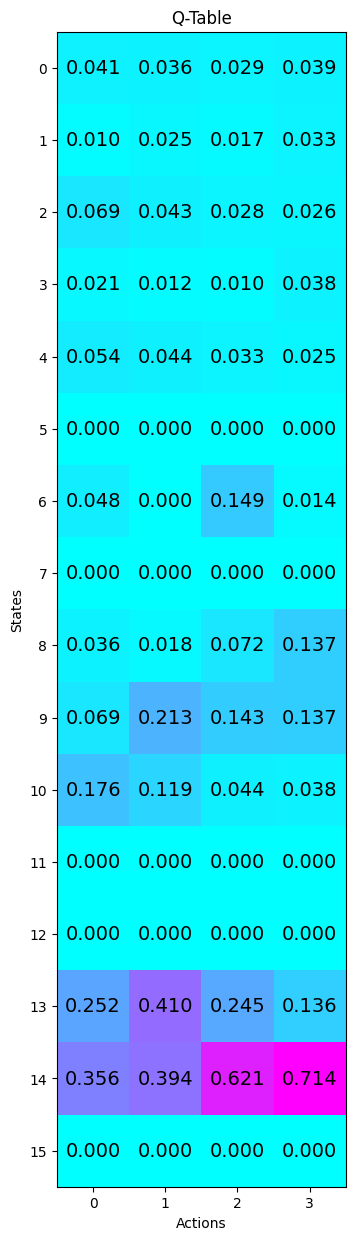

In [7]:
plot_q_values(best_Q, best_env, figsize=(20, 15))